# **Bank Marketing Campaign Analysis & Subscription Prediction Project**

### **Problem Statement**

Financial institutions often run marketing campaigns to promote term deposit subscriptions. However, targeting the wrong audience leads to inefficiency, increased costs, and customer dissatisfaction. This project aims to develop a predictive model that determines whether a client will subscribe to a term deposit based on various personal, contact, and socio-economic characteristics.
This prediction model will help the bank optimize its marketing strategy, reduce unnecessary outreach, and target high-conversion clients , improving overall customer acquisition efficiency.

### **Objective**:
Build a machine learning model that accurately predicts if a client will subscribe to a term deposit using historical data from previous marketing campaigns.

### **Data Overview & Summary Statistics**

(i) Dataset Used: bank-additional-full.csv

(ii) Total Records: 41,188

(iii) Total Features: 20

**Key Variables**:

1. Features: Age, Job, Marital Status, Education, Default, Housing, Loan, Contact, Month, Day of Week, Duration, Campaign, Pdays, Previous, Poutcome, Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed.

2. Target Variable: y — whether the client subscribed to a term deposit (yes/no).

3.  Age :

 -  Max_Age: 98(yrs)

 -  Min_Age: 17(yrs) 

4. Duration

  - Min: 0

  - Max: 4918

5. Campaign
 - Min: 0
- Max: 56



## **Exploratory Data Analysis Highlights**

### Target Variable Distribution
- **"No"**: ~88.5%
- **"Yes"**: ~11.5%

### Age Group Insights
- Highest subscription rate: **30–50 age bracket**

### Job Type
- **Students and Retired** show highest conversion rates
- **Blue-collar** shows the lowest

###  Marital Status
- **Single** clients are more likely to subscribe

### Day of Week
- Best response on **Tuesdays and Wednesdays**

### Duration of Call
- Positive correlation with subscription, but not used for prediction (leakage)
  

## **Machine Learning Pipeline**

### Target Class Distribution
The dataset is imbalanced, with only ~11% of clients subscribing to term deposits.
This necessitates the use of SMOTE oversampling or class weights during modeling.

### Train-Test Split
- **80/20** ratio using `train_test_split`

### Preprocessing
- **Categorical encoding**: Label Encoding
- **Class balancing**: SMOTE (Synthetic Minority Oversampling Technique)
- **Feature selection**: Removed `duration` to prevent data leakage

### Model: Random Forest Classifier
```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [114]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [57]:
# Loading the dataset
bankanalysis_dt = pd.read_csv('bank-additional-full.csv')

In [58]:
# showing the first 5 rows 
bankanalysis_dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
# rows and columns numbers
bankanalysis_dt.shape

(41188, 21)

In [60]:
# data information
bankanalysis_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [61]:
# summary statistics
bankanalysis_dt.describe( )

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
# checking for null valus 
bankanalysis_dt.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [63]:
# duplicates checking
bankanalysis_dt.duplicated().sum()

12

In [64]:
bankanalysis_dt[bankanalysis_dt.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [65]:
# Find out which columns are actually causing duplicates
duplicated_columns = bankanalysis_dt.columns[(bankanalysis_dt.nunique() != len(bankanalysis_dt))].tolist()
duplicated_columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [66]:
# displaying duplicated rows
bankanalysis_dt[ bankanalysis_dt.duplicated()].sort_values(by='job')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


## Data Visualization 

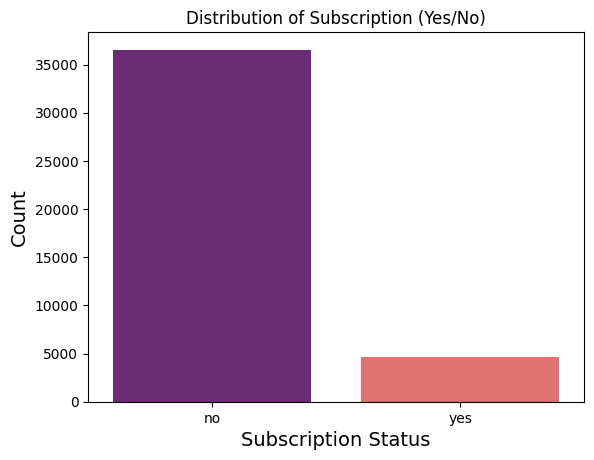

In [67]:
# Target Variable Distribution
sns.countplot(x='y', data= bankanalysis_dt,palette='magma',hue='y')
plt.title('Distribution of Subscription (Yes/No)')
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

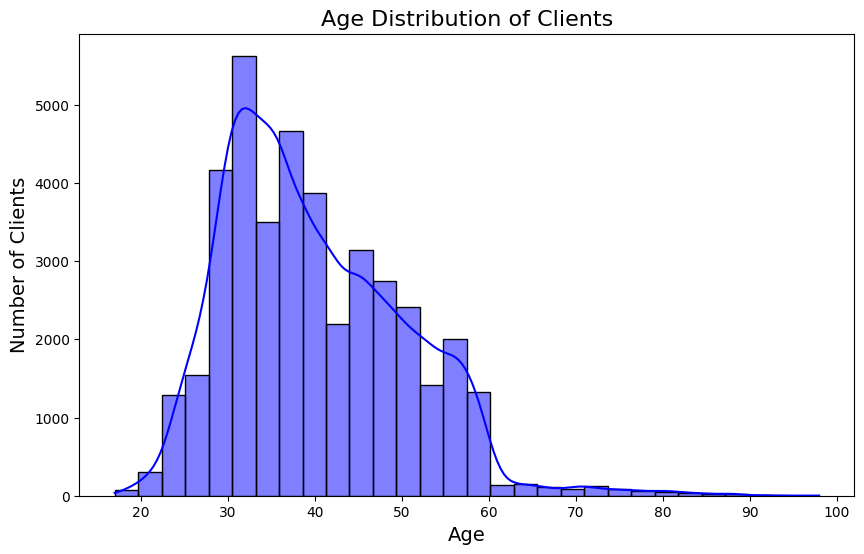

In [68]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(bankanalysis_dt['age'], bins=30, kde=True,color='blue')
plt.title('Age Distribution of Clients', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.show()

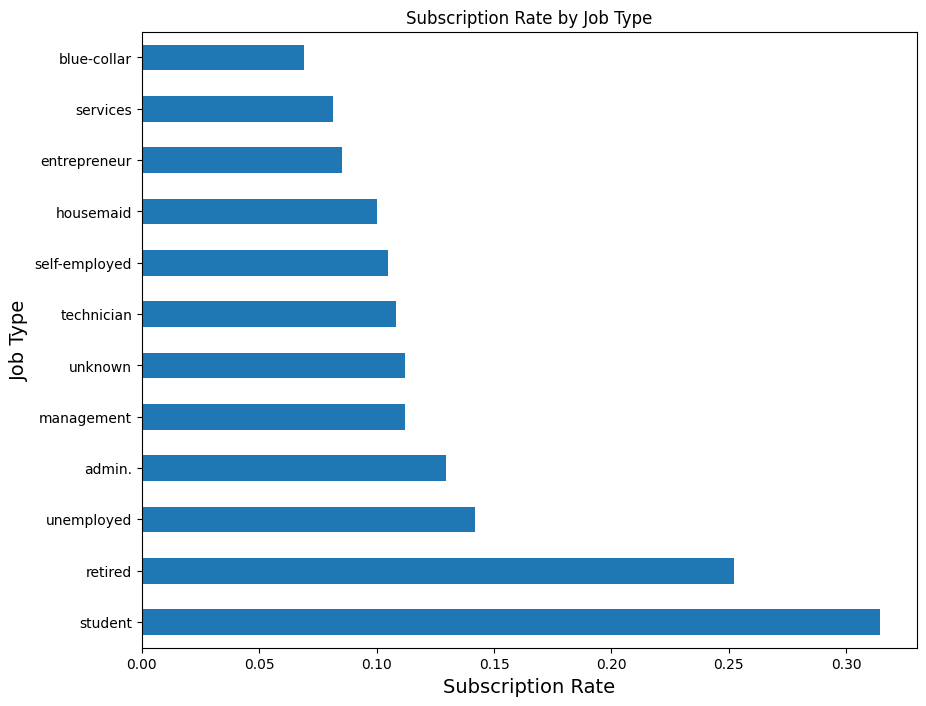

In [69]:
# Subscription Rate by Job Type
job_rate = bankanalysis_dt.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
job_rate.plot(kind='barh', title='Subscription Rate by Job Type')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Subscription Rate', fontsize=14)
plt.ylabel('Job Type', fontsize=14)
plt.show()

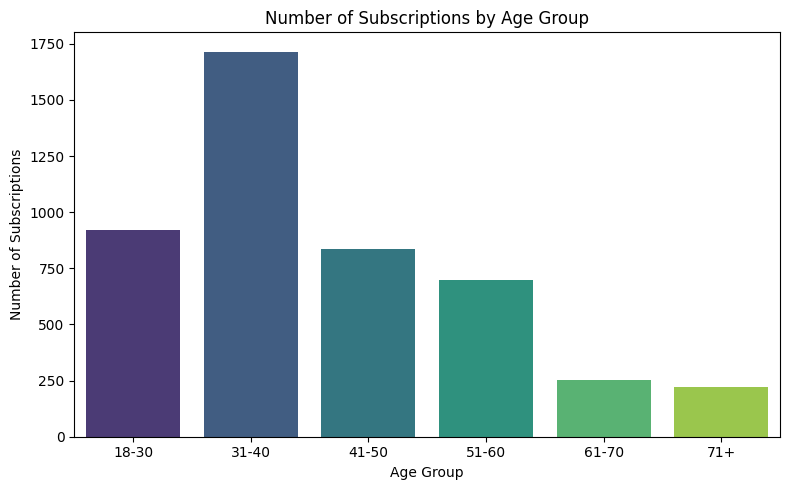

In [87]:
# subscription Rate by Age Group
#Define age groups
age_bins = [18, 30, 40, 50, 60, 70, 100]  # last bin up to 100 to capture all ages
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create new column for age group
bankanalysis_dt['age_group'] = pd.cut(bankanalysis_dt['age'], bins=age_bins, labels=age_labels, right=False)

# Filter only subscribers ('yes')
subscribed = bankanalysis_dt[bankanalysis_dt['y'] == 'yes']

# Count subscriptions by age group
subscription_counts = subscribed['age_group'].value_counts().sort_index()

# Plot the result
plt.figure(figsize=(8,5))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette='viridis', hue = subscription_counts.index)

plt.title('Number of Subscriptions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Subscriptions')
plt.tight_layout()
plt.show()

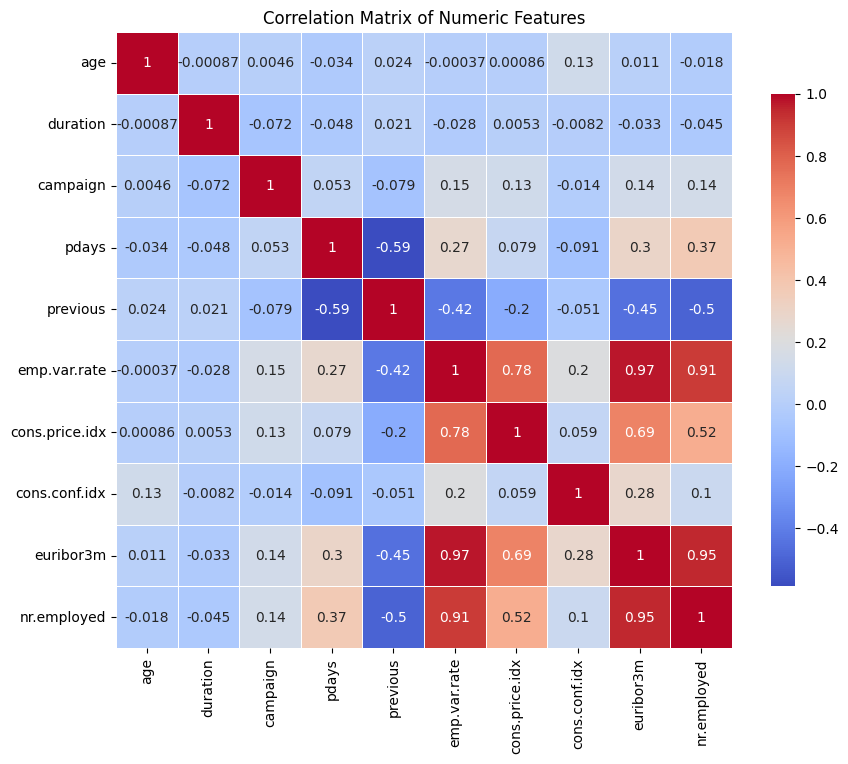

In [79]:
# Numerical Correlation Heatmap
numeric_dt = bankanalysis_dt.select_dtypes(include=['number'])
corr_matrix = numeric_dt.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,            
            cmap='coolwarm',      
            square=True,           
            linewidths=0.5,        
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

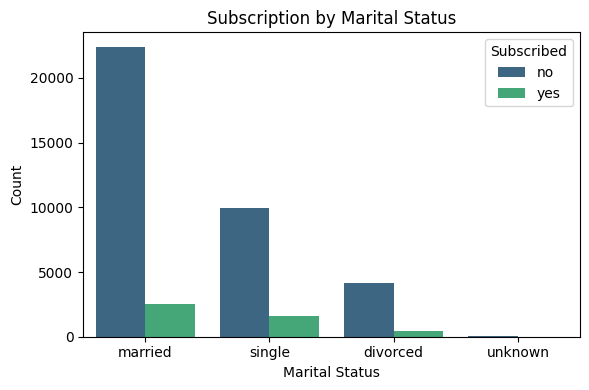

In [91]:
# Subscription vs Marital Status

plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='y', data=bankanalysis_dt, palette='viridis')

plt.title('Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

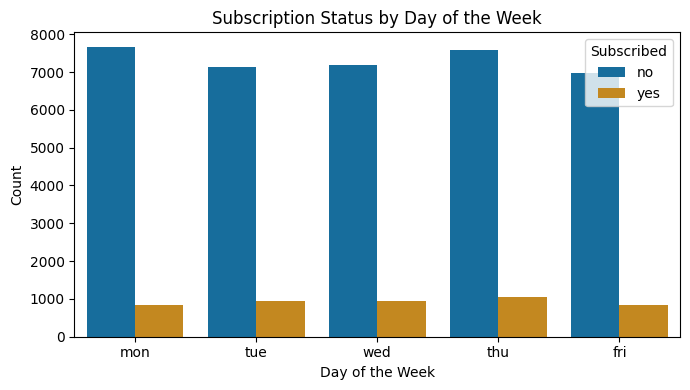

In [104]:
# Days_0f_week_contacted vrs Subscription

plt.figure(figsize=(7,4))
sns.countplot(x='day_of_week', hue='y', data=bankanalysis_dt, palette='colorblind')

plt.title('Subscription Status by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

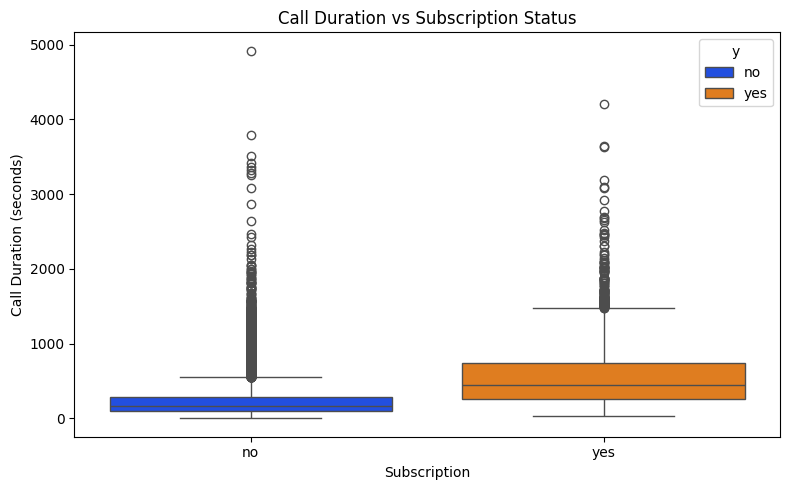

In [112]:
#  Duration of Call vs Subscription
plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=bankanalysis_dt, palette='bright', hue='y', legend=False)

plt.title('Call Duration vs Subscription Status')
plt.xlabel('Subscription')
plt.ylabel('Call Duration (seconds)')
plt.tight_layout()
plt.show()

##  Feature Engineering


In [115]:
# Prepare features and target
X = bankanalysis_dt.drop('y', axis=1)
y = bankanalysis_dt['y']

In [116]:
# Encode Categorical Variables
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

In [ ]:
 # Encode target variable ('yes'/'no' to 1/0)
y = le.fit_transform(y)

In [113]:
# Subscription Imbalance
bankanalysis_dt['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [118]:
# Scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Apply scaler only to numeric columns
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [119]:
# Dataset Spliting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [122]:
# Handle Missing Values in 'age_group'
X_train['age_group'] = X_train['age_group'].cat.add_categories('Unknown').fillna('Unknown')

#  Convert 'age_group' (categorical) to numeric codes
X_train['age_group'] = X_train['age_group'].cat.codes


In [127]:
# creating age_group in X_test

X_test['age_group'] = pd.cut(X_test['age'], 
                             bins=[18,30,40,50,60,70,80], 
                             labels=['18-30','30-40','40-50','50-60','60-70','70-80'])
X_test['age_group'] = X_test['age_group'].cat.add_categories('Unknown').fillna('Unknown')
X_test['age_group'] = X_test['age_group'].cat.codes

In [124]:
# Train a Classifier (Random Forest model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Predictions & and Evaluation
y_pred = model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[7059  244]
 [ 454  481]]

Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.97      0.95      7303
         yes       0.66      0.51      0.58       935

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238


Accuracy Score: 0.915270696771061


 ## **Insights Derived**
 
1. **Duration of Interaction Matters**:
- Longer conversations increase the likelihood of subscription. Encourage agents to engage more meaningfully.<br>

2. **Client Profiling**:
- Focus on younger clients and those in admin., technician, and service roles.
- Avoid targeting individuals who previously declined (especially after multiple failures).
3. **Campaign Timing**:
- There's no strong correlation with day_of_week or month, suggesting flexibility in scheduling.
4. **Economic Indicators**:
- External economic factors like emp.var.rate, cons.conf.idx, and euribor3m influence decisions.
5. **Follow-ups**:
- Clients contacted multiple times showed lower conversion rates — avoid excessive follow-ups unless prior interaction was positive.
6. **Client Segmentation**
- Younger clients (**25–40 years**) had higher conversion rates.
- Clients in admin., technician, and services job categories were more likely to convert.
- Longer call durations (**> 300 seconds**) correlated strongly with subscription success.
7. **Communication Strategy**
- The cellular contact method was more effective than the telephone.
- Previous successful interactions significantly increased the chances of subscription.

## **Recommendations**
**For Marketing Team**
- Prioritise clients with previous success: Use past campaign results to target only those with a history of positive responses.
- Use cellular contact method: Increase usage of mobile numbers where available.
- Lengthen engagement time: Train sales reps to spend more time per call.
- Avoid repetitive contacts without success: If a client has rejected multiple times, skip them unless there’s a new offer.
- Segment by age and job type: Target 25–40-year-olds in admin., technician, and service jobs.
  
**For Business Strategy**
- Incorporate the model into CRM: Automate lead scoring based on likelihood to convert.
- Track campaign KPIs: Monitor duration, poutcome, and contact frequency as key metrics.
- Dynamic offer creation: Tailor offers based on client profile and timing.
